In [2]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon
import numpy as np
from skimage.draw import ellipse
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap, BoundaryNorm
from image_utils import discrete_imshow, make_ellipse, make_rectangle, make_ellipse_thickness

%load_ext autoreload
%autoreload 2

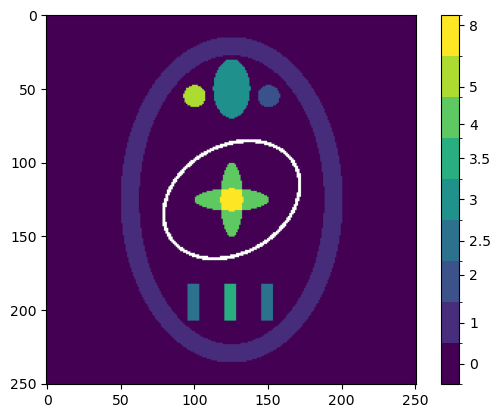

In [196]:
# Try to construct a phantom that would lead to exterior problem
N = 251
X = make_ellipse_thickness(intensity=1.0, thickness=0.05, axis_a=0.44, axis_b=0.3, center_x=0.5, center_y=0.5, shape=(N, N))

X += make_ellipse(intensity=3.0, axis_a=0.08, axis_b=0.05, center_x=0.5, center_y=0.2, shape=(N, N))
X += make_ellipse(intensity=5.0, axis_a=0.03, axis_b=0.03, center_x=0.40, center_y=0.22, shape=(N, N))
X += make_ellipse(intensity=2.0, axis_a=0.03, axis_b=0.03, center_x=0.60, center_y=0.22, shape=(N, N))

# Impenetrable center circle
X += make_ellipse_thickness(thickness=0.01, intensity=9999, axis_a=0.15, axis_b=0.2, center_x=0.5, center_y=0.5, theta=30, shape=(N, N))
X[X==9999] = np.inf

# Bottom grill
X += make_rectangle(intensity=2.5, width=0.03, height=0.1, center_x=0.4, center_y=0.78, shape=(N, N))
X += make_rectangle(intensity=3.5, width=0.03, height=0.1, center_x=0.5, center_y=0.78, shape=(N, N))
X += make_rectangle(intensity=2.5, width=0.03, height=0.1, center_x=0.6, center_y=0.78, shape=(N, N))

# Center treasure
X += make_ellipse(intensity=4.0, axis_a=0.1, axis_b=0.03, center_x=0.5, center_y=0.5, shape=(N, N))
X += make_ellipse(intensity=4.0, axis_a=0.03, axis_b=0.1, center_x=0.5, center_y=0.5, shape=(N, N))

# plt.imshow(X, cmap="gray")
discrete_imshow(X)

/zhome/e2/d/117429/Desktop/s164564/miniconda3/envs/cil/lib/python3.12/site-packages/matplotlib/colors.py:783: RuntimeWarning: invalid value encountered in less
  mask_under = xa < 0
/zhome/e2/d/117429/Desktop/s164564/miniconda3/envs/cil/lib/python3.12/site-packages/matplotlib/colors.py:784: RuntimeWarning: invalid value encountered in greater_equal
  mask_over = xa >= self.N


<Figure size 640x480 with 0 Axes>

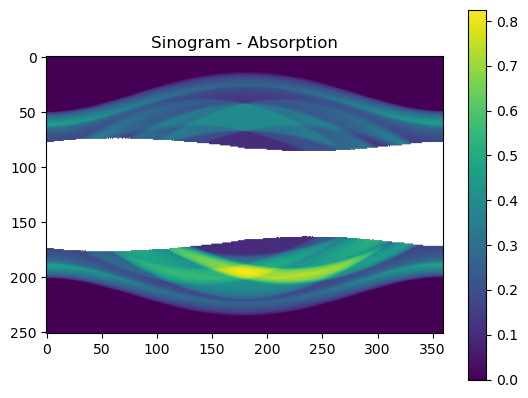

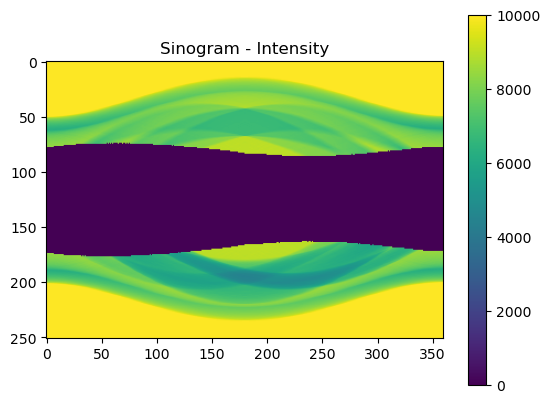

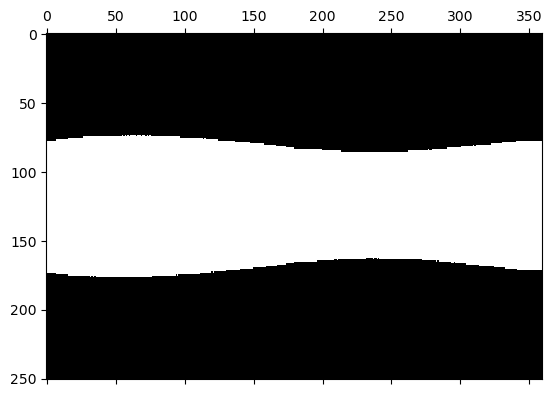

In [197]:
theta = np.linspace(0, 180, 360, endpoint=False)

plt.figure()
A = radon(X, theta=theta) / N
I_0 = 1e4
I = I_0 * np.exp(-A)
I = np.nan_to_num(I, copy=False, nan=0.0)

plt.figure()
plt.imshow(A)
plt.title("Sinogram - Absorption")
plt.colorbar()

plt.figure()
plt.imshow(I)
plt.title("Sinogram - Intensity")
plt.colorbar()

plt.figure()
plt.spy(I)

# I_noisy = np.random.poisson(I)
# Avoid log(0) by using maximum of 1
# A_noisy = -np.log(np.maximum(I, 1) / I_0)

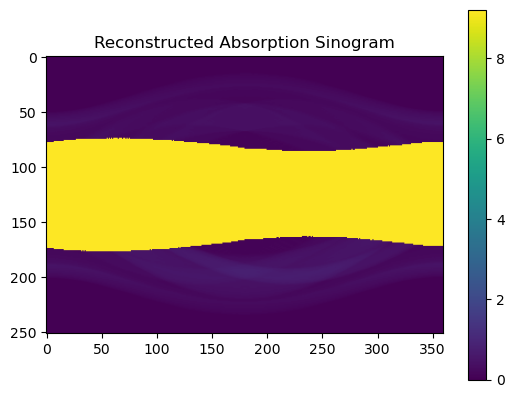

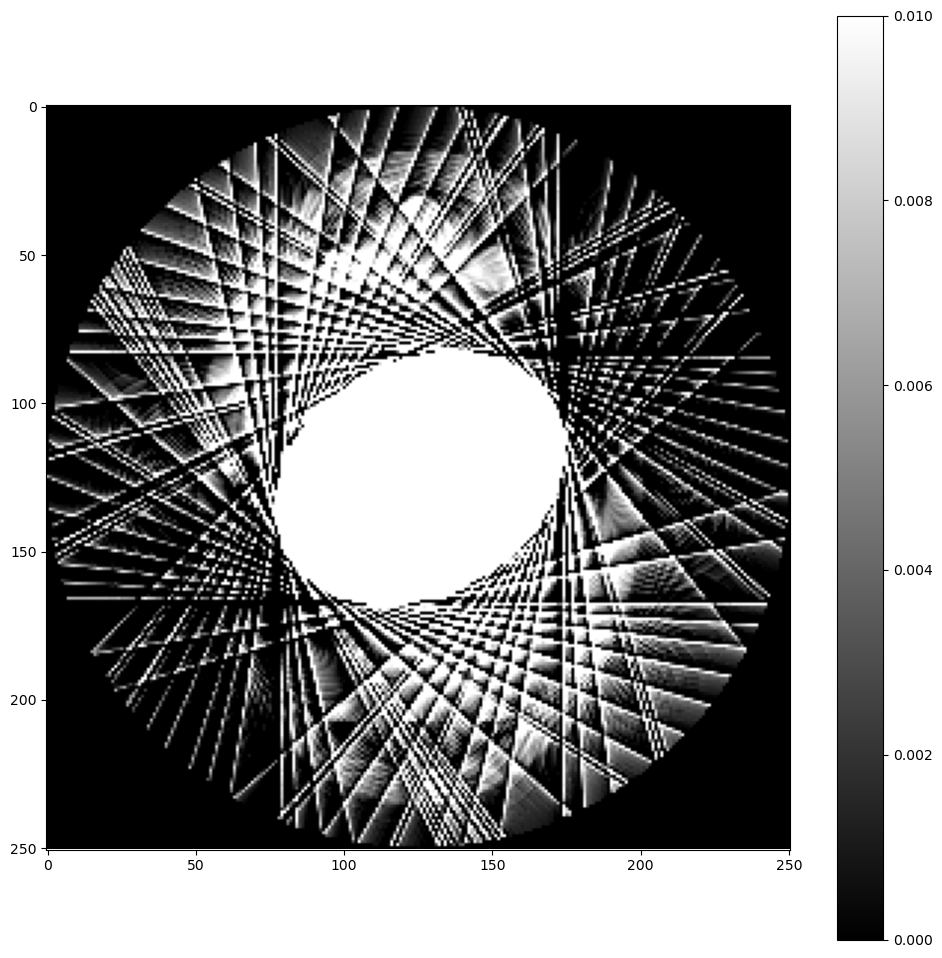

In [198]:
A_recon = -np.log(np.maximum(I, 1)) + np.log(I_0)
# A_recon = -np.log(I / I_0)


plt.figure()
plt.imshow(A_recon)
plt.title("Reconstructed Absorption Sinogram")
plt.colorbar()

X_recon = iradon(A_recon, theta=theta, output_size=N,)
# discrete_imshow(X_recon)

X_recon[X_recon < 0] = 0.0  # Clip negative values for better visualization

plt.figure(figsize=(12, 12))
plt.imshow(X_recon, cmap="gray", vmax=0.01)
plt.colorbar()

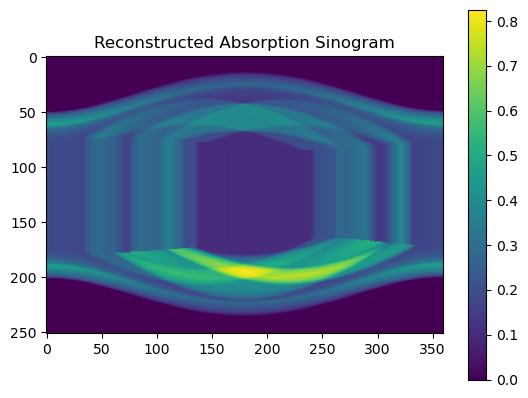

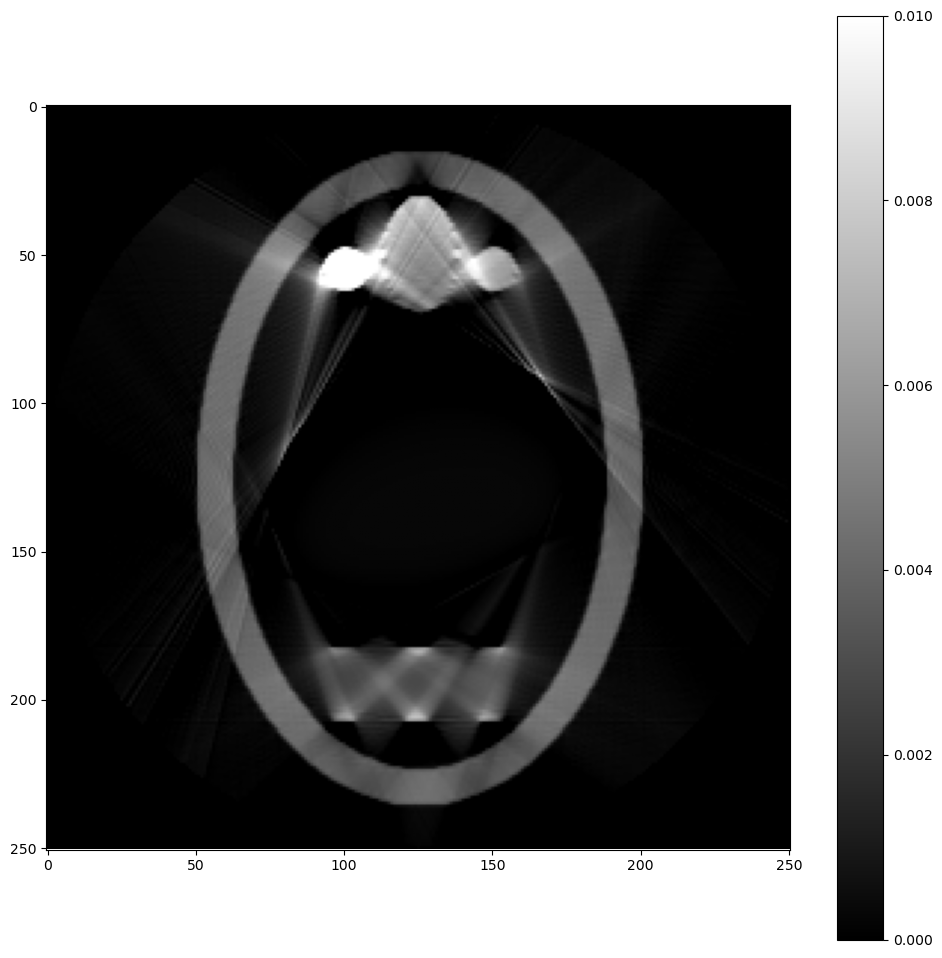

In [199]:
I_fill = I.copy()
I_fill[I_fill < 1000] = 0
for i in range(I_fill.shape[1]):
    idx_zeros = np.where(I_fill[:,i] < 1000)[0]
    I_fill[[*idx_zeros,idx_zeros[0]-1,idx_zeros[-1]+1],i] = max(I_fill[idx_zeros[0]-2,i],I_fill[idx_zeros[-1]+2,i])
    
A_recon = -np.log(np.maximum(I_fill, 1)) + np.log(I_0)

plt.figure()
plt.imshow(A_recon)
plt.title("Reconstructed Absorption Sinogram")
plt.colorbar()

X_recon = iradon(A_recon, theta=theta, output_size=N,)
# discrete_imshow(X_recon)

X_recon[X_recon < 0] = 0.0  # Clip negative values for better visualization

plt.figure(figsize=(12, 12))
plt.imshow(X_recon, cmap="gray", vmax=0.01)
plt.colorbar()

In [202]:
I_fill = I.copy()
for i in range(I_fill.shape[1]):
    idx_zeros = np.where(I_fill[:,i] == 0)[0]
    I_fill[idx_zeros[:idx_zeros.shape[0]//2],i] = np.linspace(I_fill[idx_zeros[0]-2,i],I_fill[idx_zeros[idx_zeros.shape[0]//2],i],idx_zeros[idx_zeros.shape[0]//2] - idx_zeros[0])
    I_fill[idx_zeros[idx_zeros.shape[0]//2:],i] = np.linspace(I_fill[idx_zeros[idx_zeros.shape[0]//2],i],I_fill[idx_zeros[-1]+2,i], idx_zeros[-1]+1 - idx_zeros[idx_zeros.shape[0]//2])

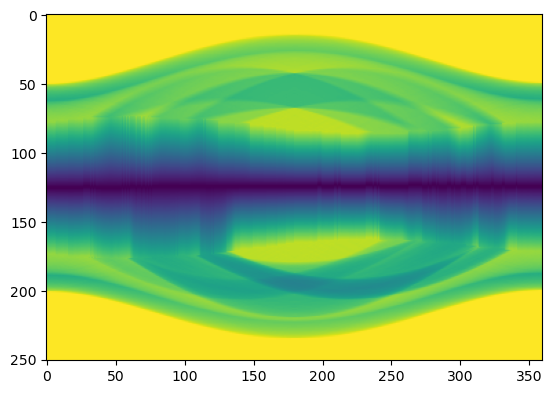

In [203]:
plt.imshow(I_fill)

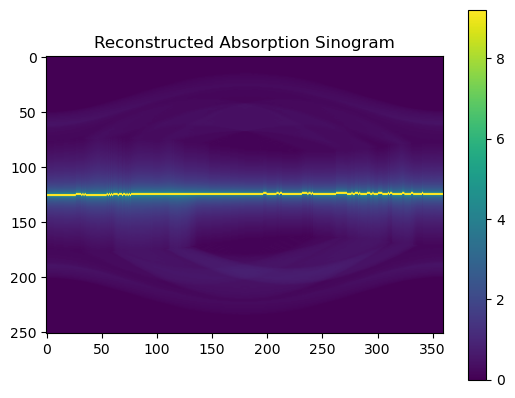

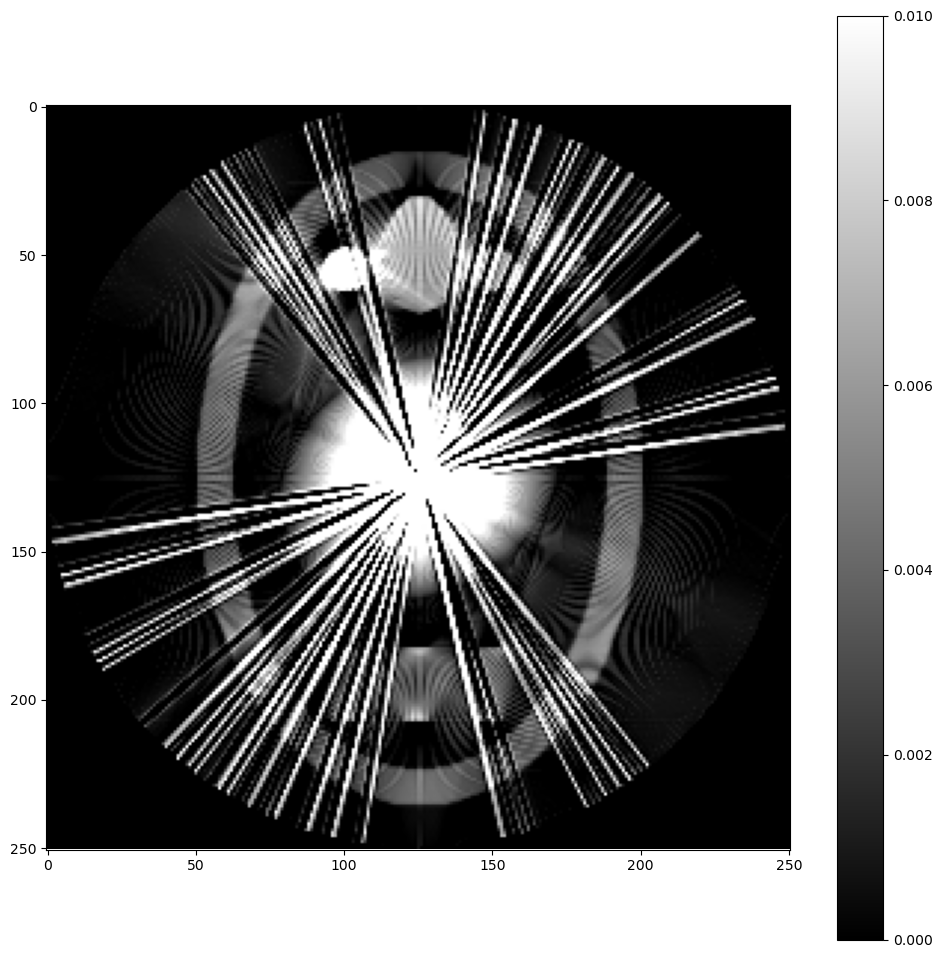

In [204]:
I_fill = I.copy()
for i in range(I_fill.shape[1]):
    idx_zeros = np.where(I_fill[:,i] == 0)[0]
    I_fill[idx_zeros[:idx_zeros.shape[0]//2],i] = np.linspace(I_fill[idx_zeros[0]-2,i],I_fill[idx_zeros[idx_zeros.shape[0]//2],i],idx_zeros[idx_zeros.shape[0]//2] - idx_zeros[0])
    I_fill[idx_zeros[idx_zeros.shape[0]//2:],i] = np.linspace(I_fill[idx_zeros[idx_zeros.shape[0]//2],i],I_fill[idx_zeros[-1]+2,i], idx_zeros[-1]+1 - idx_zeros[idx_zeros.shape[0]//2])

A_recon = -np.log(np.maximum(I_fill, 1)) + np.log(I_0)

plt.figure()
plt.imshow(A_recon)
plt.title("Reconstructed Absorption Sinogram")
plt.colorbar()

X_recon = iradon(A_recon, theta=theta, output_size=N,)
# discrete_imshow(X_recon)

X_recon[X_recon < 0] = 0.0  # Clip negative values for better visualization

plt.figure(figsize=(12, 12))
plt.imshow(X_recon, cmap="gray", vmax=0.01)
plt.colorbar()

C:\Users\jeppe\AppData\Local\Temp\ipykernel_39780\1470033142.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap(cmap_name, n_colors)


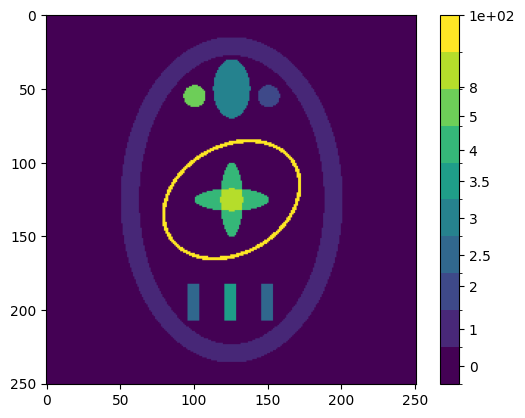

<Figure size 640x480 with 0 Axes>

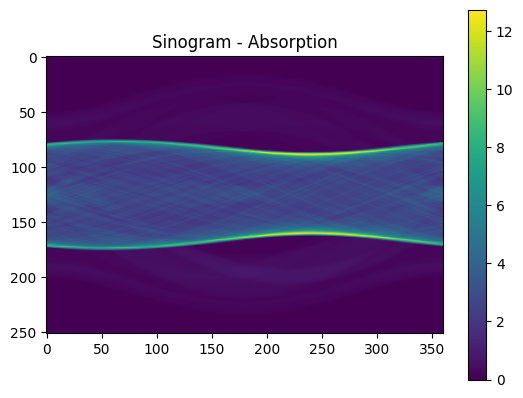

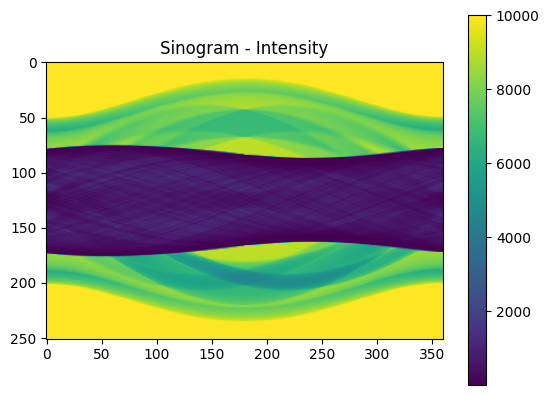

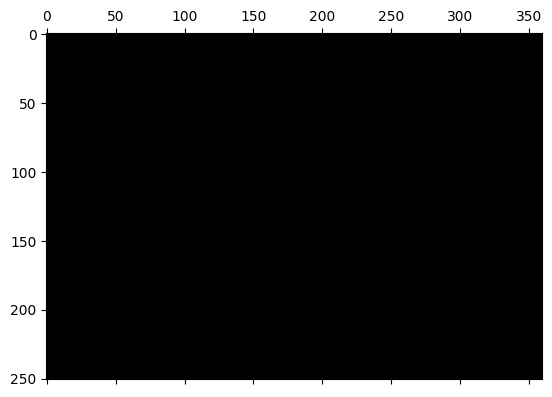

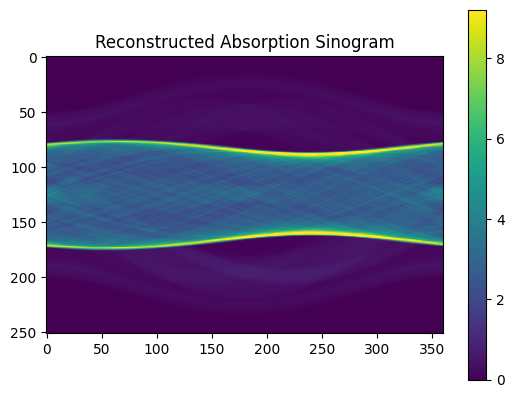

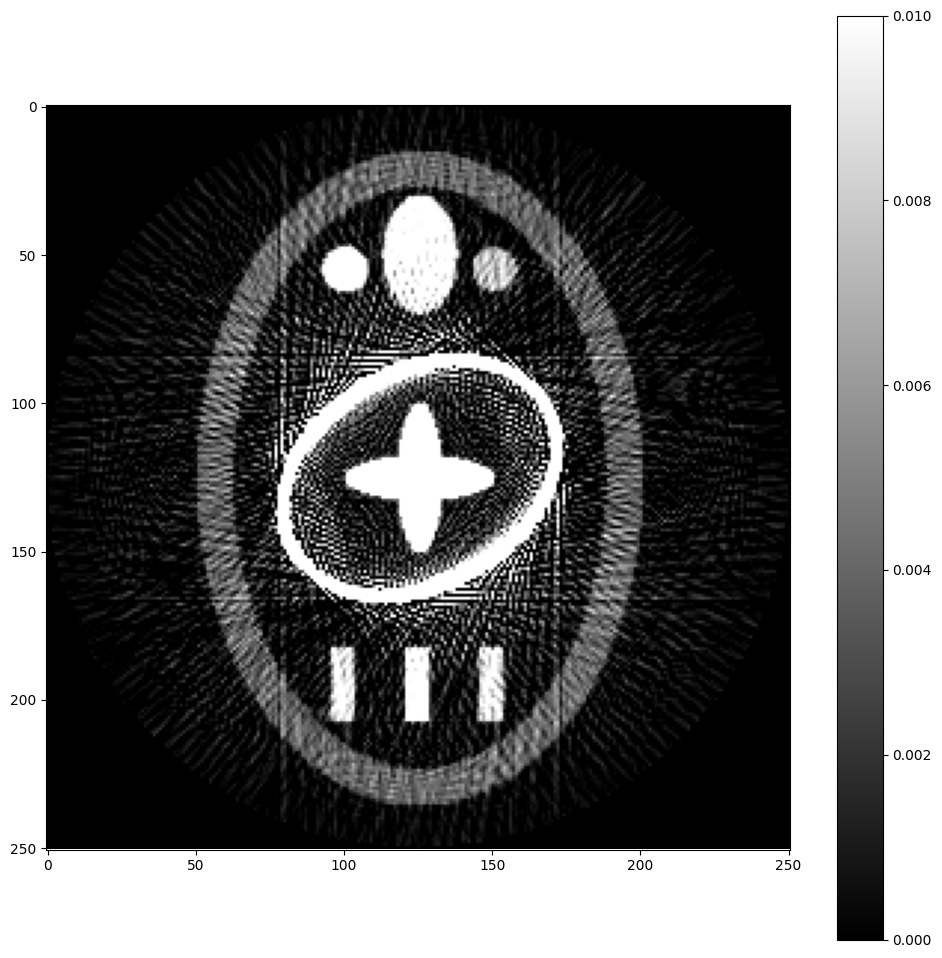

In [105]:
# Try to construct a phantom that would lead to exterior problem
N = 251
X = make_ellipse_thickness(intensity=1.0, thickness=0.05, axis_a=0.44, axis_b=0.3, center_x=0.5, center_y=0.5, shape=(N, N))

X += make_ellipse(intensity=3.0, axis_a=0.08, axis_b=0.05, center_x=0.5, center_y=0.2, shape=(N, N))
X += make_ellipse(intensity=5.0, axis_a=0.03, axis_b=0.03, center_x=0.40, center_y=0.22, shape=(N, N))
X += make_ellipse(intensity=2.0, axis_a=0.03, axis_b=0.03, center_x=0.60, center_y=0.22, shape=(N, N))

# Impenetrable center circle
INTENSITY_CENTER = 100
X += make_ellipse_thickness(thickness=0.01, intensity=INTENSITY_CENTER, axis_a=0.15, axis_b=0.2, center_x=0.5, center_y=0.5, theta=30, shape=(N, N))
# X[X==INTENSITY_CENTER] = np.inf

# Bottom grill
X += make_rectangle(intensity=2.5, width=0.03, height=0.1, center_x=0.4, center_y=0.78, shape=(N, N))
X += make_rectangle(intensity=3.5, width=0.03, height=0.1, center_x=0.5, center_y=0.78, shape=(N, N))
X += make_rectangle(intensity=2.5, width=0.03, height=0.1, center_x=0.6, center_y=0.78, shape=(N, N))

# Center treasure
X += make_ellipse(intensity=4.0, axis_a=0.1, axis_b=0.03, center_x=0.5, center_y=0.5, shape=(N, N))
X += make_ellipse(intensity=4.0, axis_a=0.03, axis_b=0.1, center_x=0.5, center_y=0.5, shape=(N, N))

# plt.imshow(X, cmap="gray")
discrete_imshow(X)

# theta = np.arange(0,180,5)#np.linspace(0, 180, 360, endpoint=False)
theta = np.linspace(0, 180, 360, endpoint=False)


plt.figure()
A = radon(X, theta=theta) / N
I_0 = 1e4
I = I_0 * np.exp(-A)
I = np.nan_to_num(I, copy=False, nan=0.0)

plt.figure()
plt.imshow(A)
plt.title("Sinogram - Absorption")
plt.colorbar()

plt.figure()
plt.imshow(I)
plt.title("Sinogram - Intensity")
plt.colorbar()

# I_noisy = np.random.poisson(I)
# Avoid log(0) by using maximum of 1
# A_noisy = -np.log(np.maximum(I, 1) / I_0)

A_recon = -np.log(np.maximum(I, 1)) + np.log(I_0)
# A_recon = -np.log(I / I_0)


plt.figure()
plt.imshow(A_recon)
plt.title("Reconstructed Absorption Sinogram")
plt.colorbar()

X_recon = iradon(A_recon, theta=theta, output_size=N,)
# discrete_imshow(X_recon)

X_recon[X_recon < 0] = 0.0  # Clip negative values for better visualization

plt.figure(figsize=(12, 12))
plt.imshow(X_recon, cmap="gray", vmax=0.01)
plt.colorbar()
